EXPLORATORY DATA ANALYSIS


In [3]:
#Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Reading the dataset from csv file from the customer
df = pd.read_csv('../data/raw/Lead Scoring.csv')


In [5]:
# shape of dataframe can be found using .shape() method
print(df.shape)


(9240, 37)


In [9]:
#printing top 5 records of the dataset
print(df.head())



                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0 

In [19]:
""# All Columns of the dataset
print(df.columns)


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [20]:
# Checking Datatypes of all columns
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

 Descriptive Statistics

In [21]:
# For Numerical Features
print(df.describe())

         Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     

In [22]:
# For Categorical Features
print(df.describe(include='O'))


                                 Prospect ID              Lead Origin  \
count                                   9240                     9240   
unique                                  9240                        5   
top     571b5c8e-a5b2-4d57-8574-f2ffb06fdeff  Landing Page Submission   
freq                                       1                     4886   

       Lead Source Do Not Email Do Not Call Last Activity Country  \
count         9204         9240        9240          9137    6779   
unique          21            2           2            17      38   
top         Google           No          No  Email Opened   India   
freq          2868         8506        9238          3437    6492   

       Specialization How did you hear about X Education  \
count            7802                               7033   
unique             19                                 10   
top            Select                             Select   
freq             1942                           

In [23]:
# To Count Unique Values per Column
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Prospect ID: 9240
Lead Number: 9240
Lead Origin: 5
Lead Source: 21
Do Not Email: 2
Do Not Call: 2
Converted: 2
TotalVisits: 41
Total Time Spent on Website: 1731
Page Views Per Visit: 114
Last Activity: 17
Country: 38
Specialization: 19
How did you hear about X Education: 10
What is your current occupation: 6
What matters most to you in choosing a course: 3
Search: 2
Magazine: 1
Newspaper Article: 2
X Education Forums: 2
Newspaper: 2
Digital Advertisement: 2
Through Recommendations: 2
Receive More Updates About Our Courses: 1
Tags: 26
Lead Quality: 5
Update me on Supply Chain Content: 1
Get updates on DM Content: 1
Lead Profile: 6
City: 7
Asymmetrique Activity Index: 3
Asymmetrique Profile Index: 3
Asymmetrique Activity Score: 12
Asymmetrique Profile Score: 10
I agree to pay the amount through cheque: 1
A free copy of Mastering The Interview: 2
Last Notable Activity: 16


In [65]:
print(df['Digital Advertisement'].value_counts())

Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64


Missing Value Analysis

In [24]:
# Finding Missing Values
print(df.isnull().sum())


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [26]:
# Percentage of Missing values
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)


Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

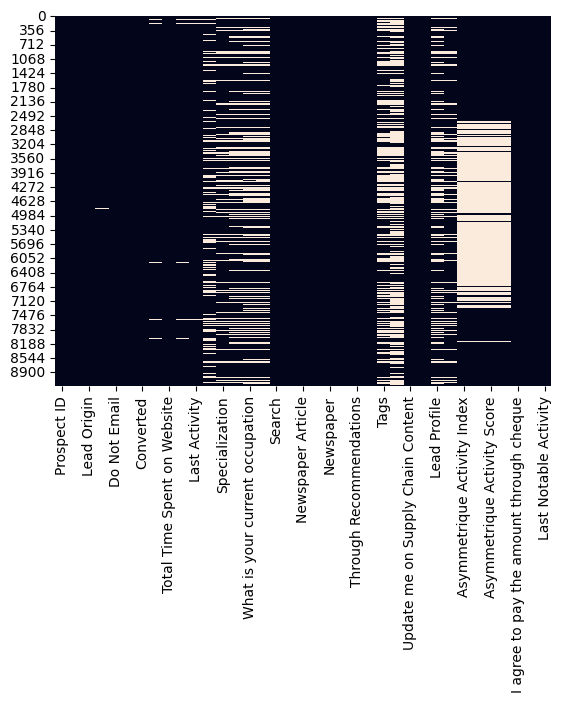

In [27]:
# Visualize Missingness

sns.heatmap(df.isnull(), cbar=False)
plt.show()


In [28]:
# Finding Total number of Duplicate Rows
print(f"Duplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


In [31]:
# Get a list of column names with numeric data types
numeric_columns = df.select_dtypes(include='number').columns.tolist()
print(numeric_columns)

['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [41]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_columns)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


Identifying Outliiers

In [63]:
# function to find outliers in a field using quartiles
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"Outliers in {col}: {len(outliers)}")

#printing outliers in every column
for col in numeric_columns:
    detect_outliers_iqr(df, col)


Outliers in Lead Number: 0
Outliers in Converted: 0
Outliers in TotalVisits: 267
Outliers in Total Time Spent on Website: 0
Outliers in Page Views Per Visit: 360
Outliers in Asymmetrique Activity Score: 716
Outliers in Asymmetrique Profile Score: 0


BOX PLOTS

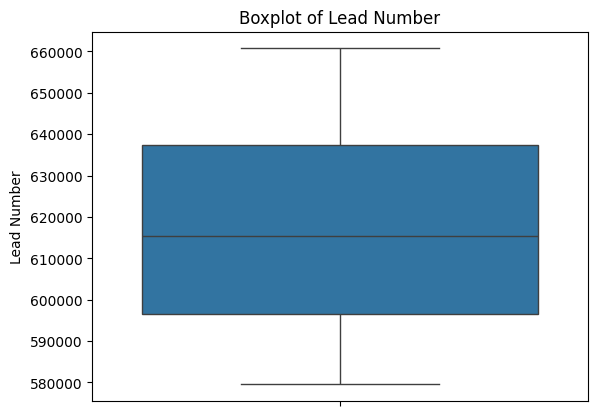

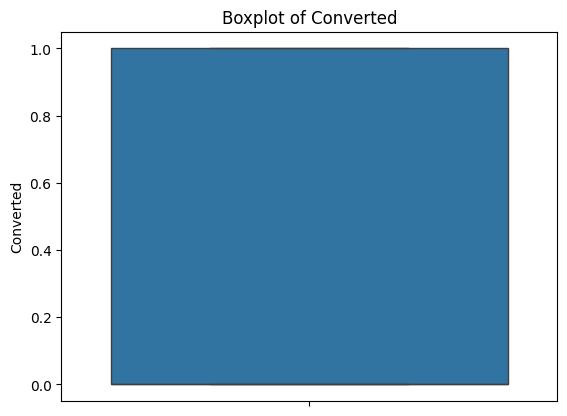

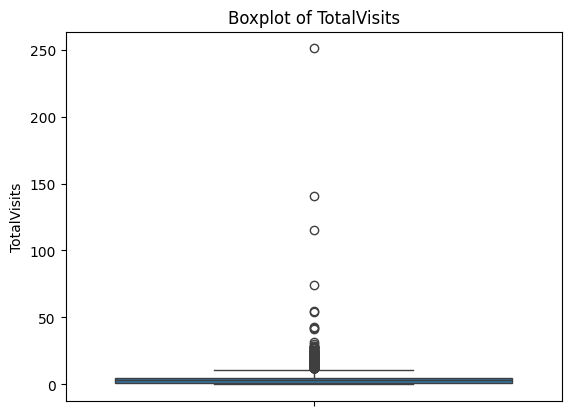

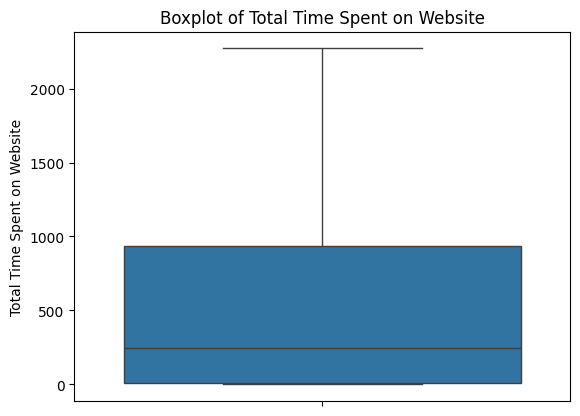

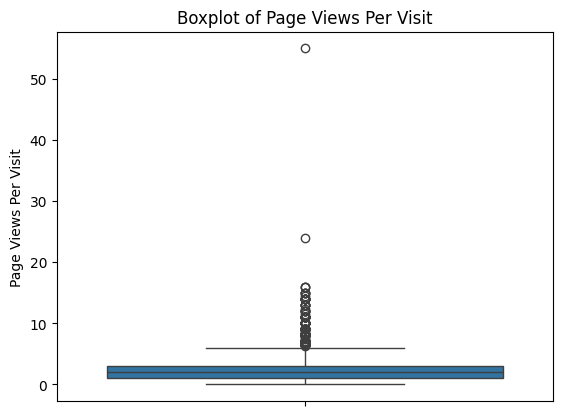

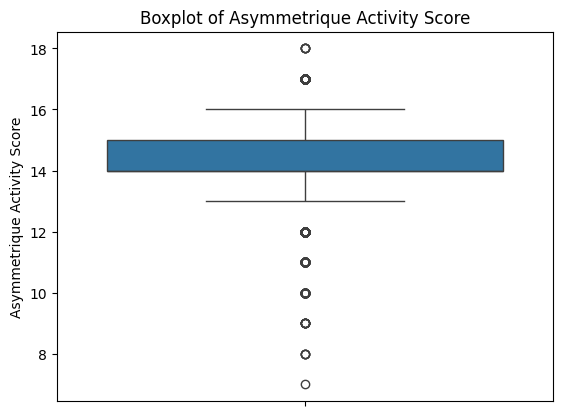

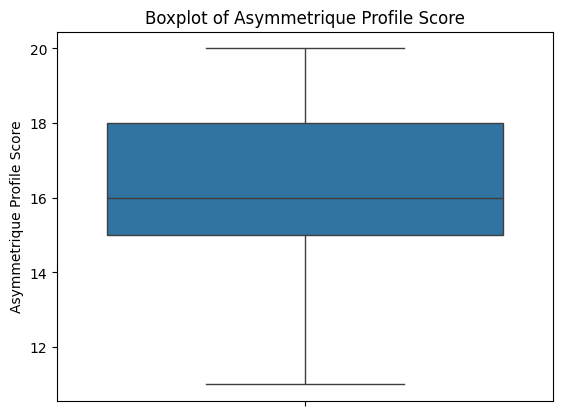

In [32]:
#  Identify Outliers
for col in numeric_columns:
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [33]:
# Calculate skewness for all numeric columns
skewness = df.skew(numeric_only=True)
print(skewness)


Lead Number                     0.140451
Converted                       0.471058
TotalVisits                    19.911657
Total Time Spent on Website     0.956450
Page Views Per Visit            2.871793
Asymmetrique Activity Score    -0.383380
Asymmetrique Profile Score      0.221739
dtype: float64


HISTOGRAMS

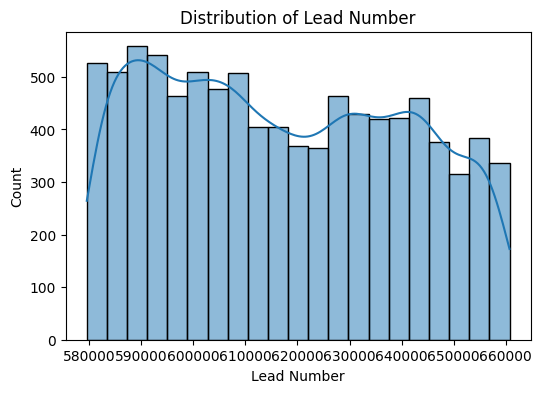

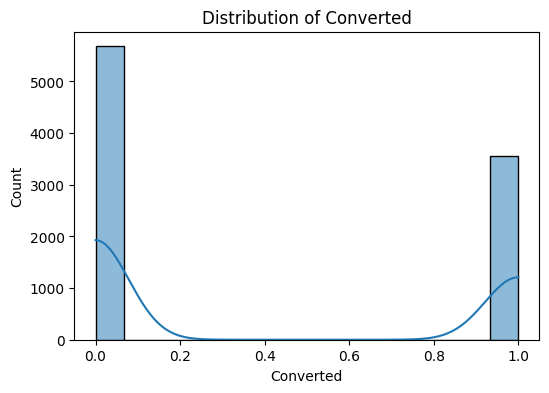

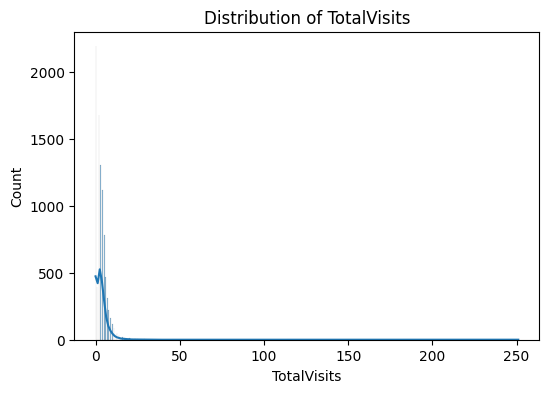

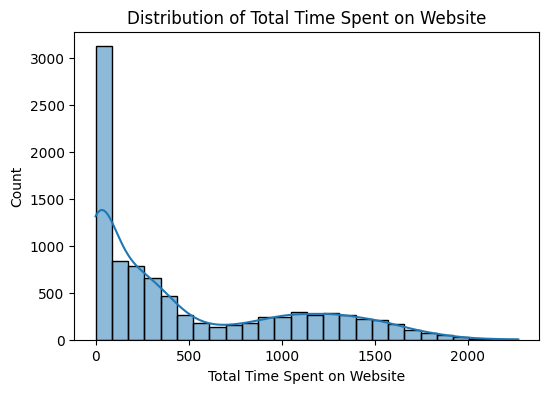

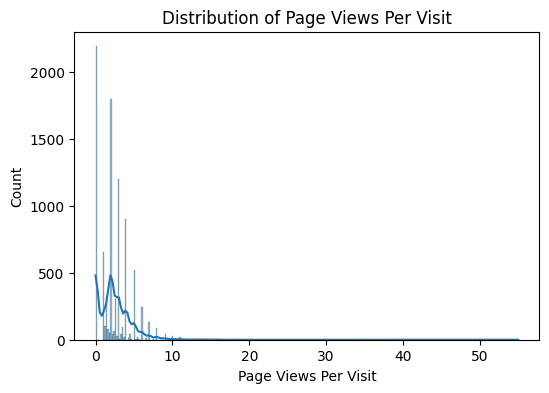

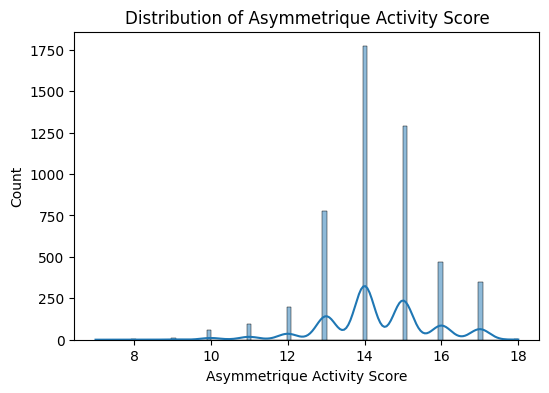

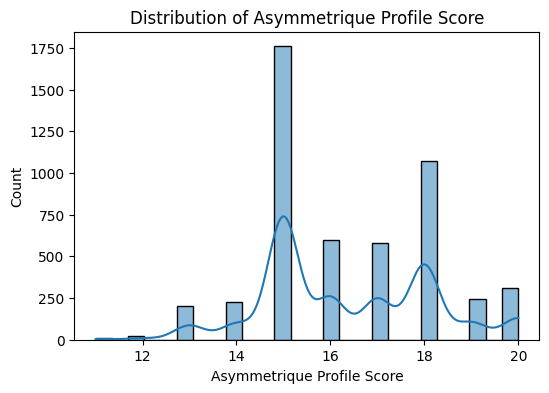

In [35]:
# Plot distributions
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
%%sql


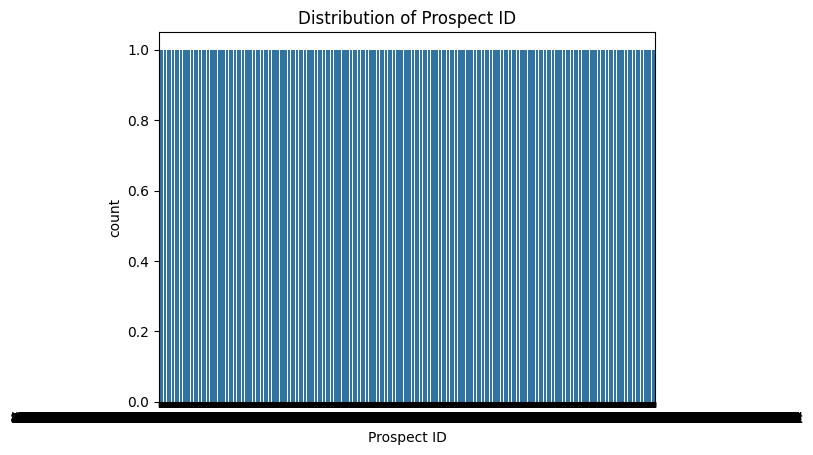

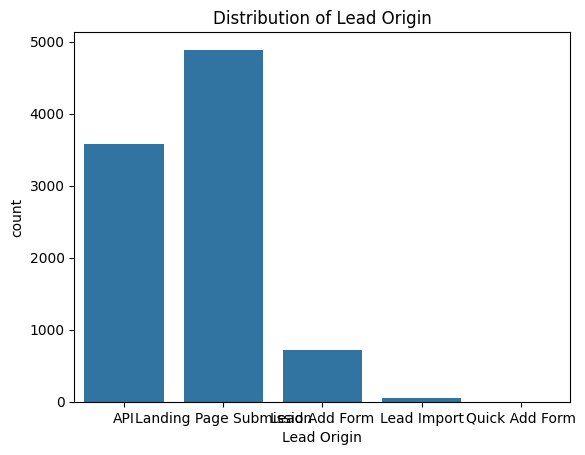

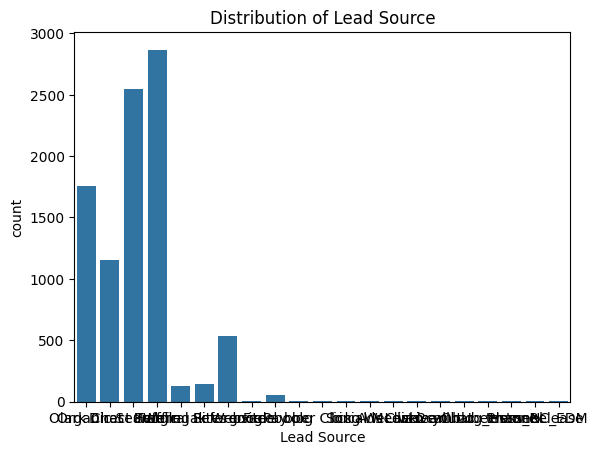

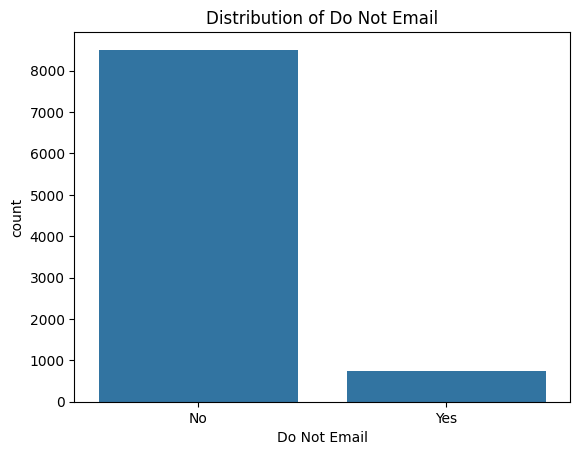

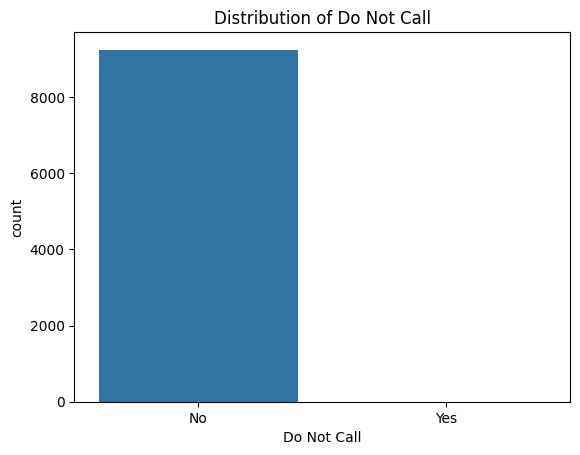

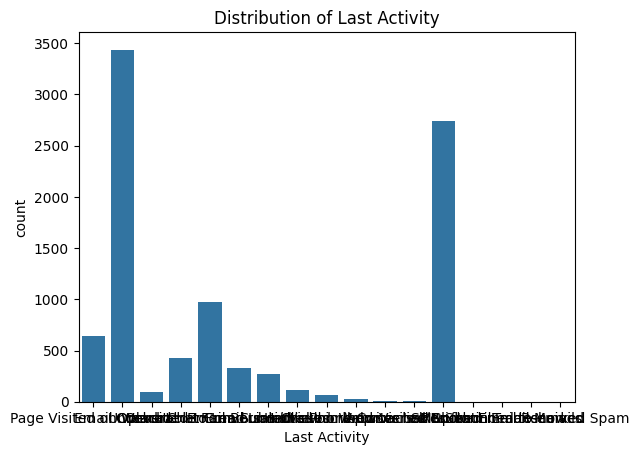

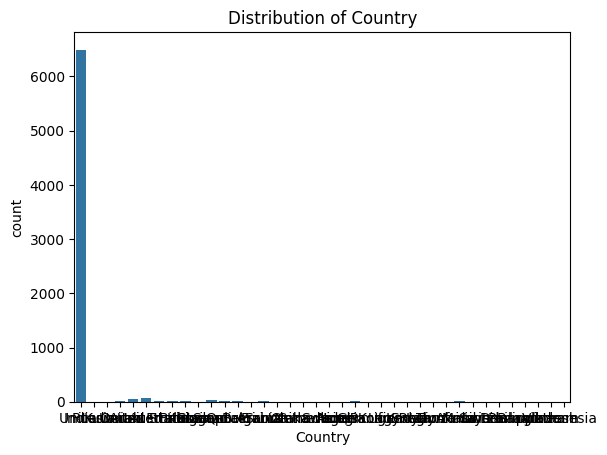

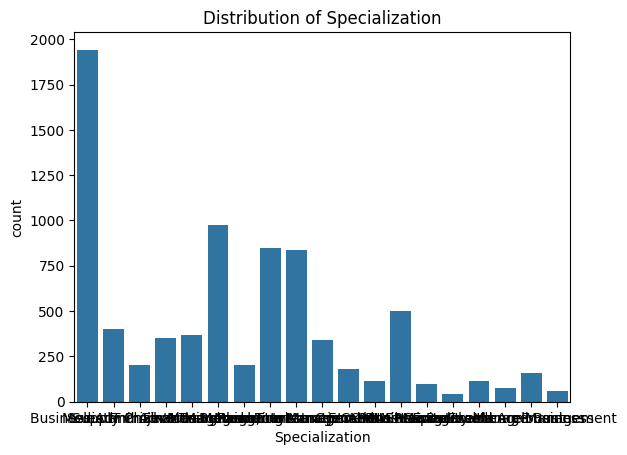

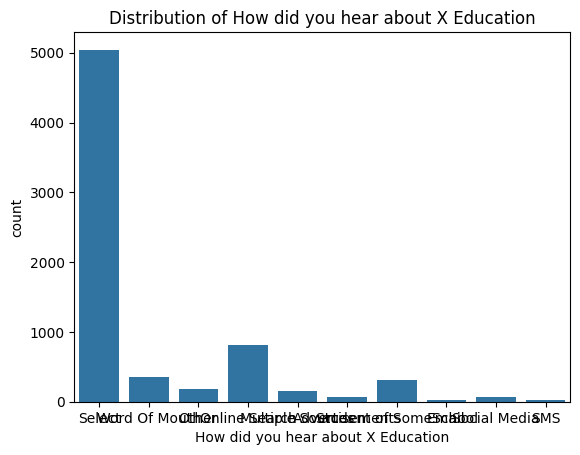

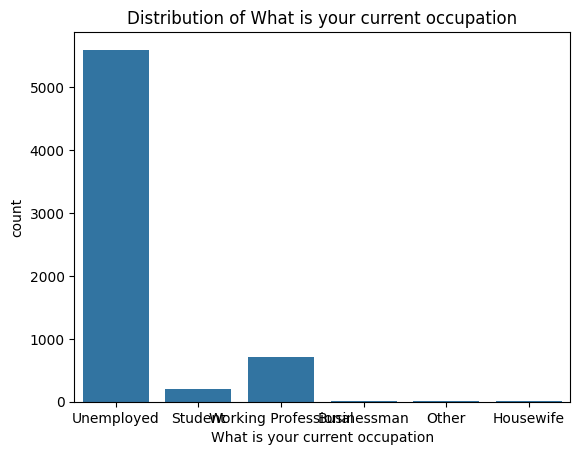

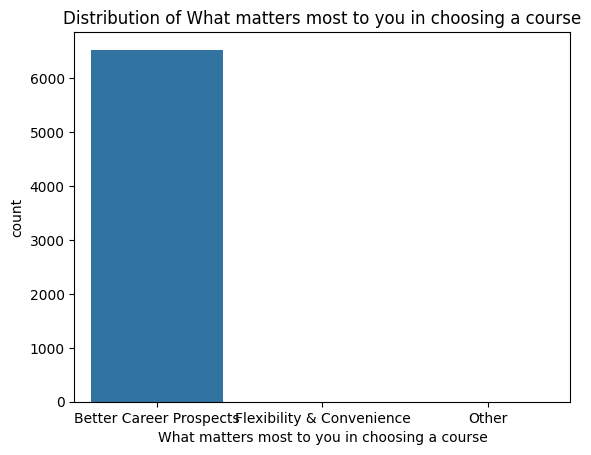

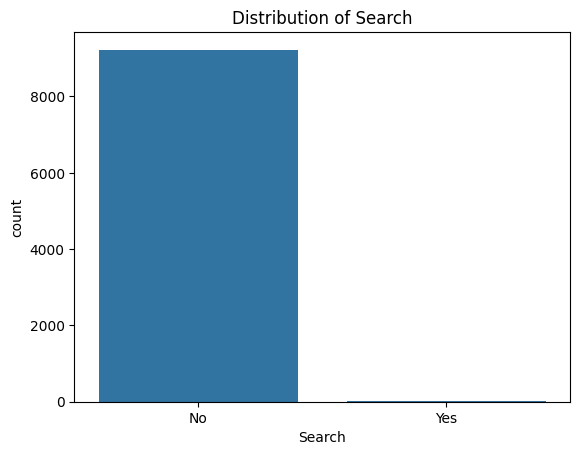

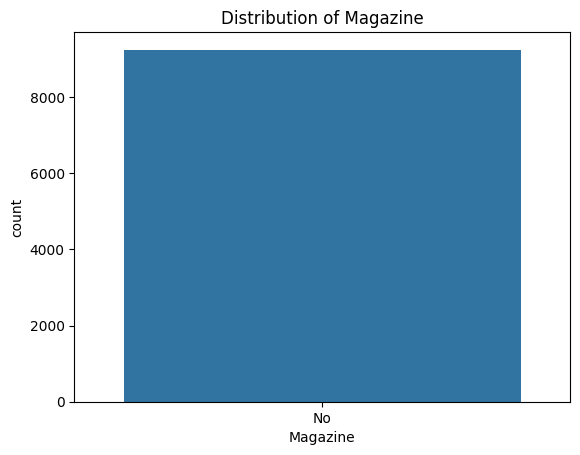

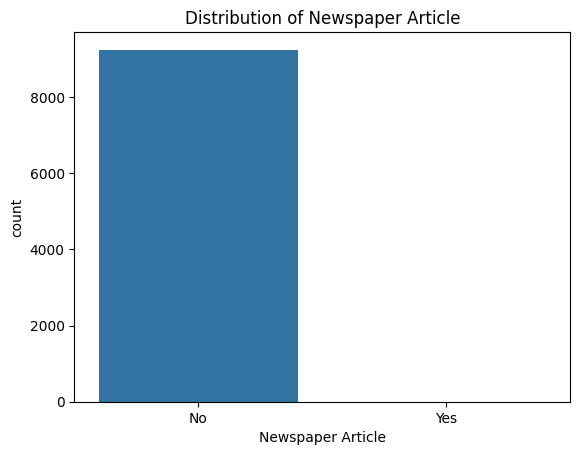

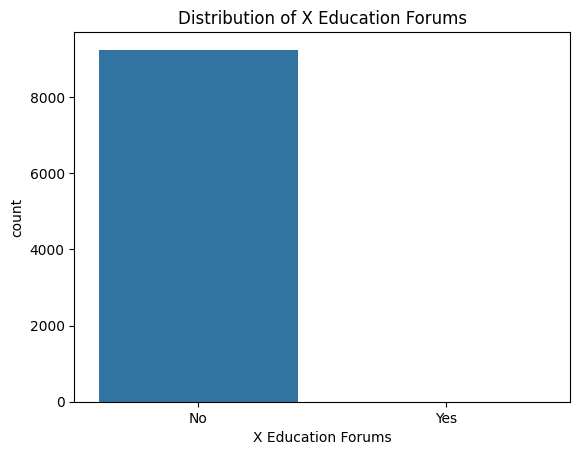

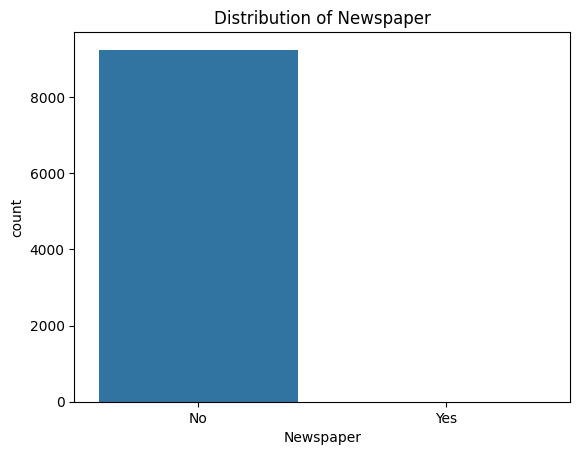

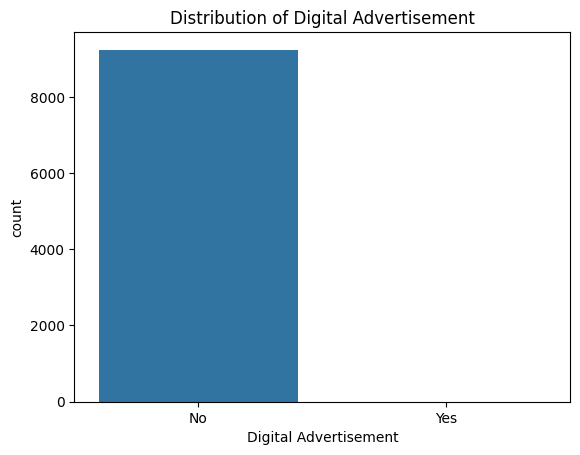

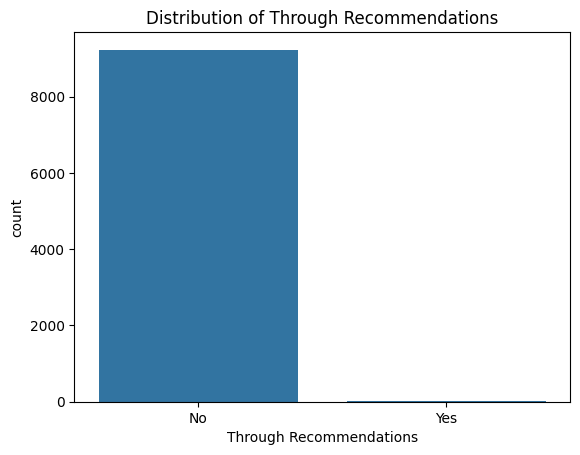

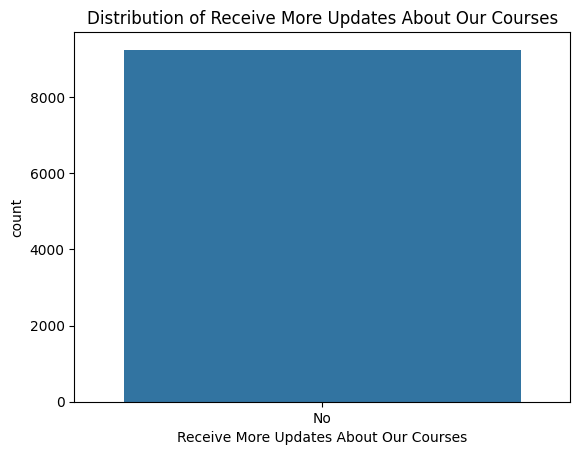

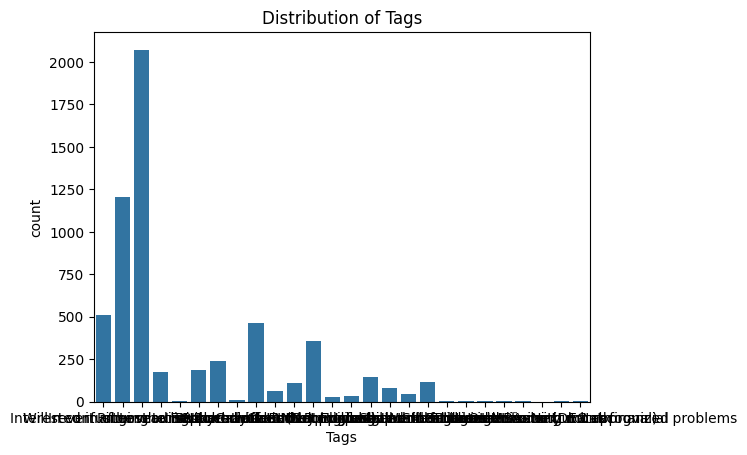

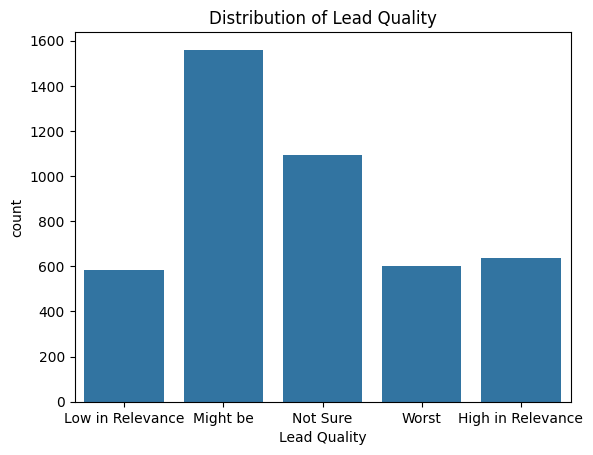

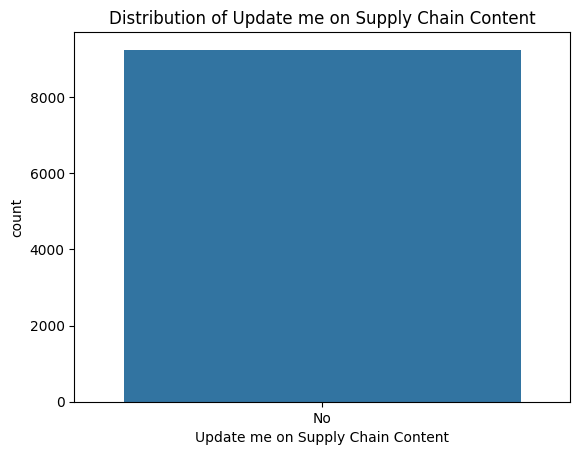

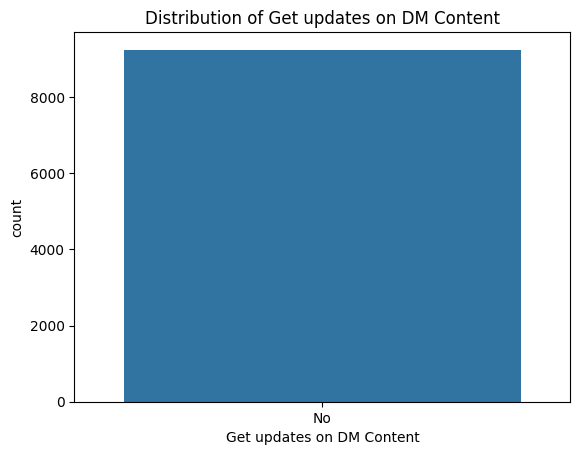

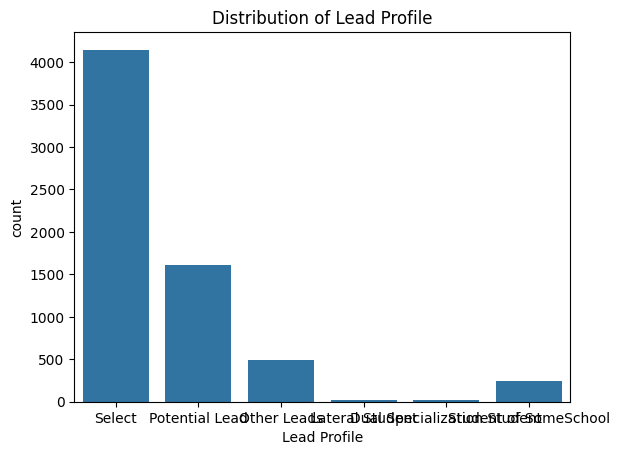

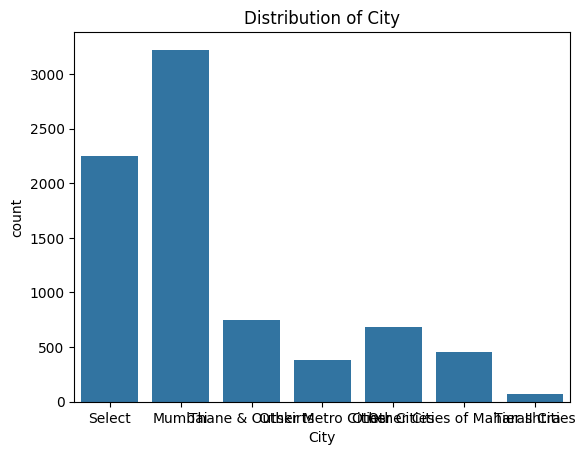

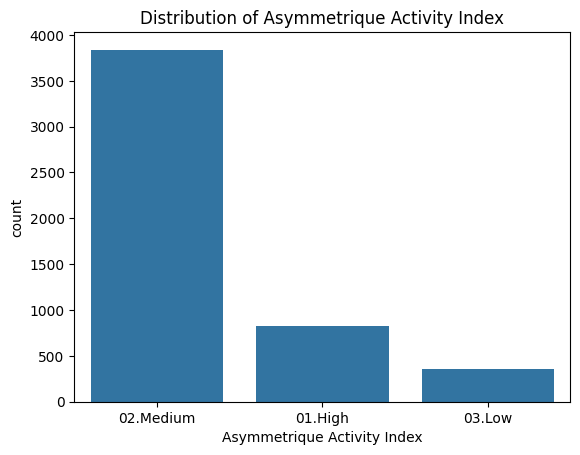

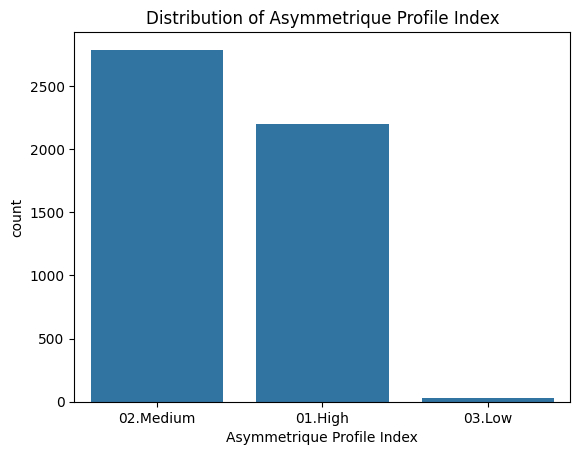

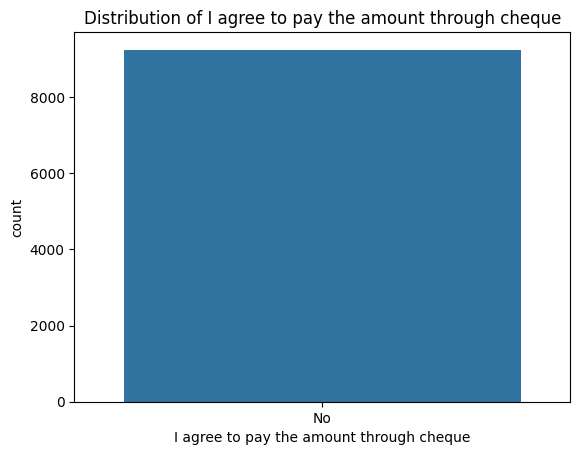

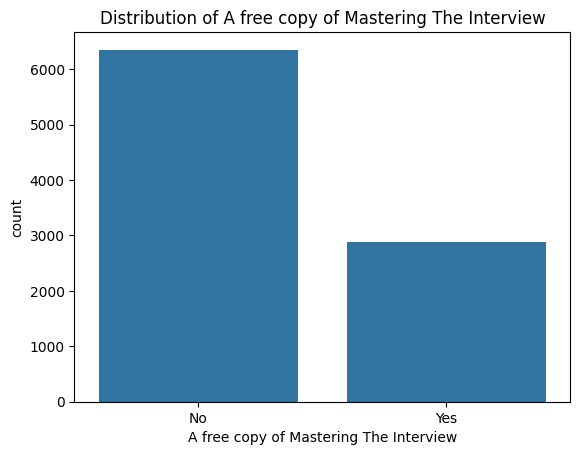

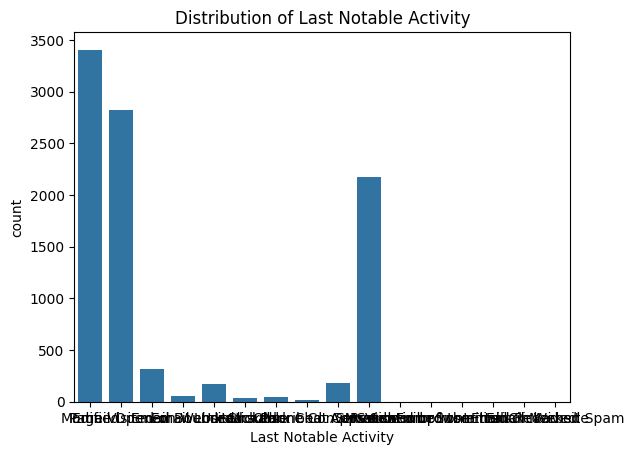

In [43]:
# Finding Distribution of each column
for col in categorical_columns:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

In [45]:
df['I agree to pay the amount through cheque'].unique()

array(['No'], dtype=object)

Bivariate/Multivariate Analysis

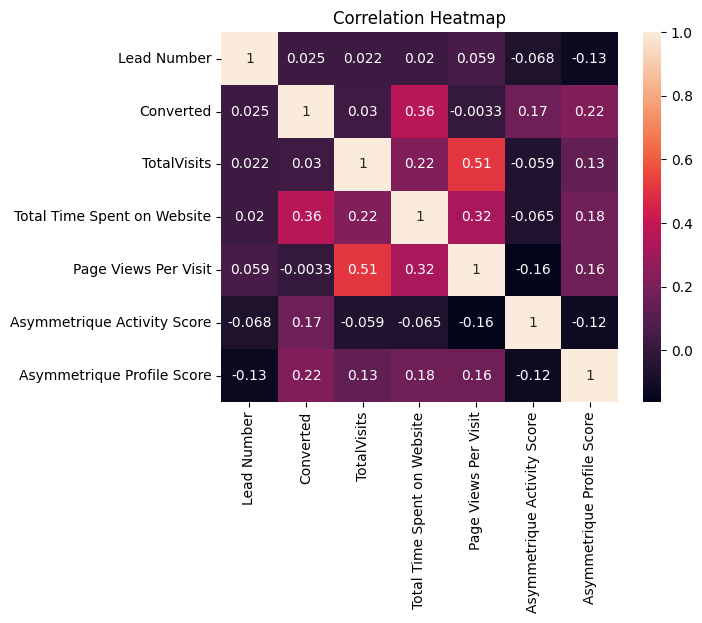

In [59]:
# Numeric-Numeric:

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()


In [61]:
# Unstack the correlation matrix, remove self-correlation (where corr=1)
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  # Remove 1s, which are self correlations

# Get top 10 strongest absolute correlations
strong_corrs = corr_pairs[corr_pairs > 0.8].drop_duplicates()
print(strong_corrs)

Series([], dtype: float64)


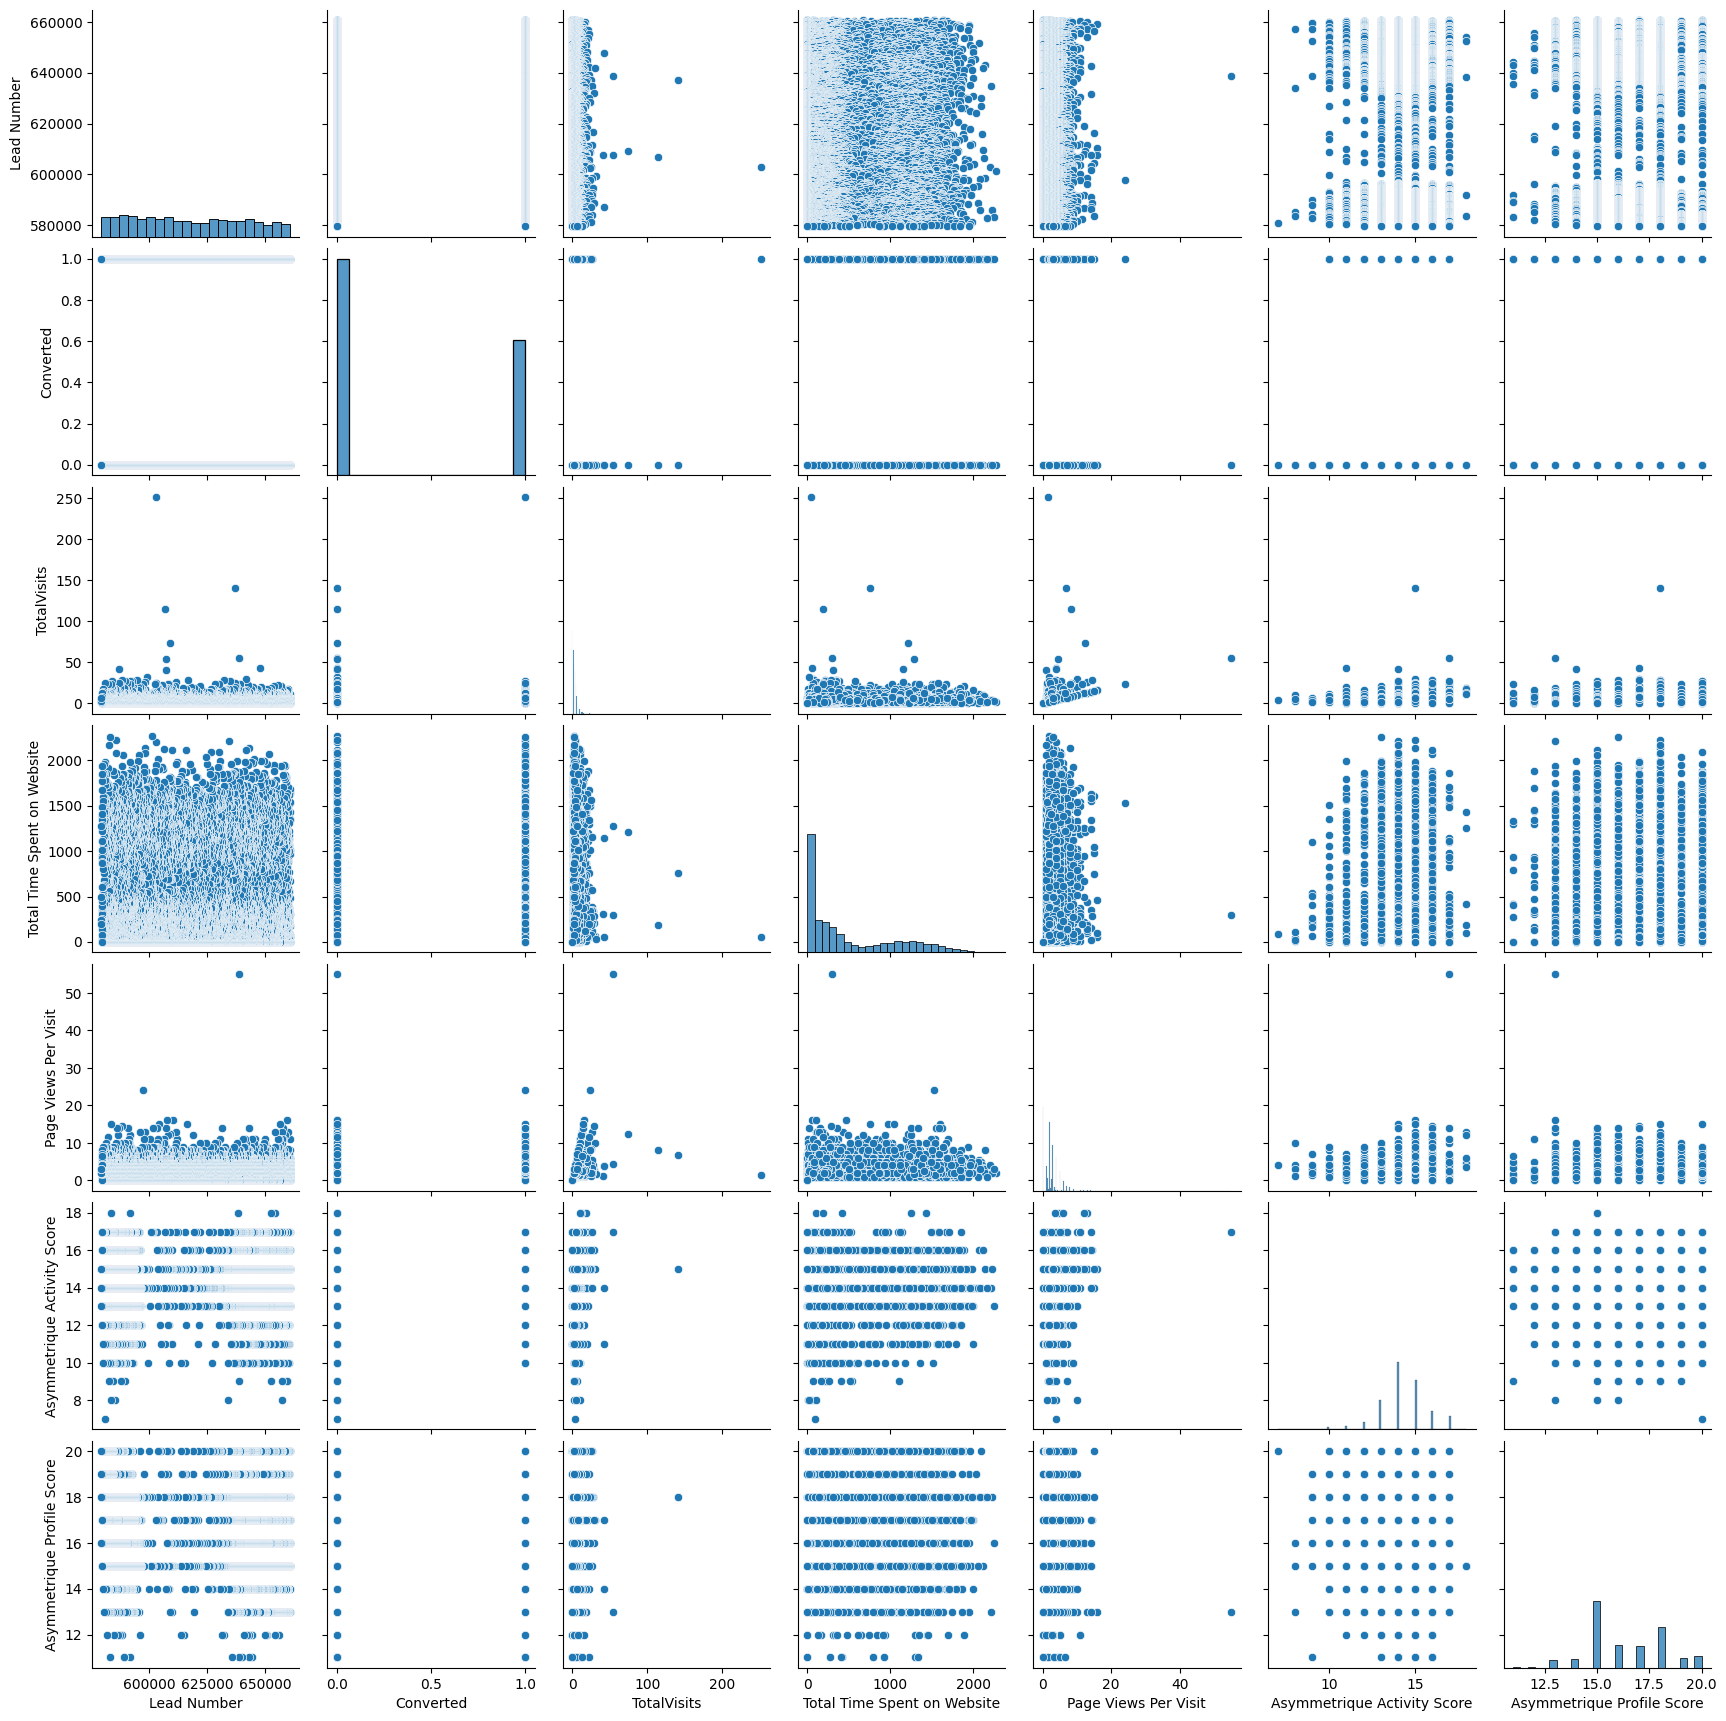

In [50]:
# PairPlot for bivariate analysis on the dataset
sns.pairplot(df)
plt.show()

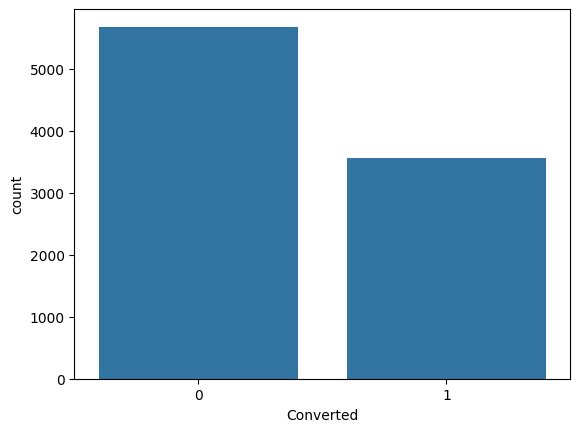

Converted
0    0.61461
1    0.38539
Name: proportion, dtype: float64


In [53]:
#  Examine Target and Class Imbalance
sns.countplot(x='Converted', data=df)
plt.show()
print(df['Converted'].value_counts(normalize=True))
